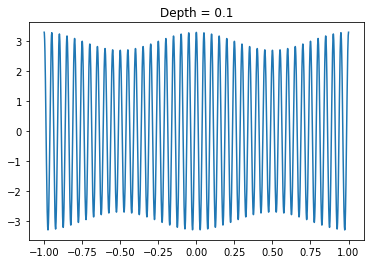

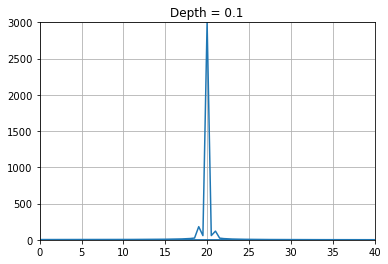

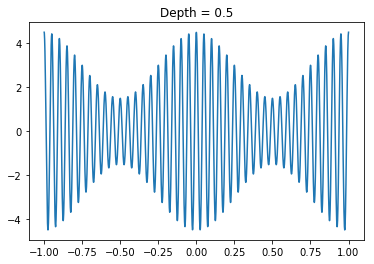

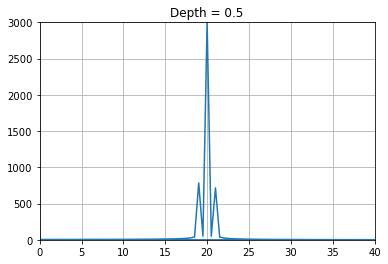

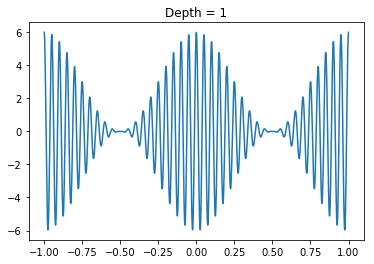

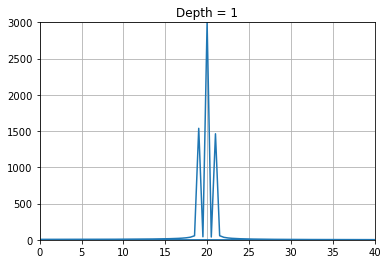

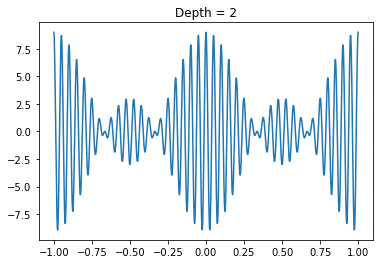

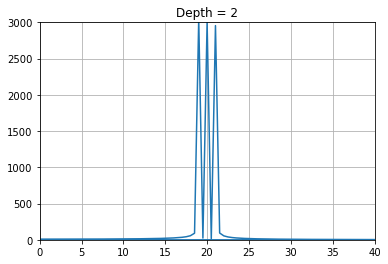

In [14]:
# %%writefile sourcesource01.py
# tasks 1, 2, 3

# 42a31d9ca0c60be06316882941d994df575848a63275c84f
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

% matplotlib inline


def sig_modulation(m, t, picname):
    # phi = 0.43 * np.pi
    #i = 0.43 * np.pi
    #A_m = 5 
    #modulation depth 

    # 0.75
    F_m = 1
    s_m = np.cos( F_m* 2 * np.pi * t) 
                      # + phi)
    # carrier signal
    f_c = 20 
#     phi_c = 0.7 * np.pi
    s_c = np.cos(f_c * 2 * np.pi * t) 
                 # + phi_c)
    A_0 = 3

    # modulation
    s_am = A_0 * (1 + m * s_m) * s_c

    fig = plt.figure()
    s = 'Depth = ' + str(m) 
    plt.title(s)
    plt.plot(t, s_am)
    fig.savefig('pictures/' + picname + 'sig.png', dpi=100)
    plt.show()

    # spectrus
    N = len(t)
    T = 1.0 / Fs
    s_amf = fft(s_am)
    xf = fftfreq(N, 1.0 / Fs)
    fig = plt.figure()
    plt.title(s)
    plt.xlim(0, 40)
    plt.ylim(0, 3000)
    plt.grid()
    plt.plot(xf, np.abs(s_amf)) 
    fig.savefig('pictures/' + picname + 'spec.png', dpi=100)
    plt.show()

# discrete frequency
Fs = 1000
t = np.linspace(-1, 1, 2 * Fs)
sig_modulation(0.1, t, '001_d0')
sig_modulation(0.5, t, '002_d5')
sig_modulation(1, t, '003_d1')
sig_modulation(2, t, '004_d2')


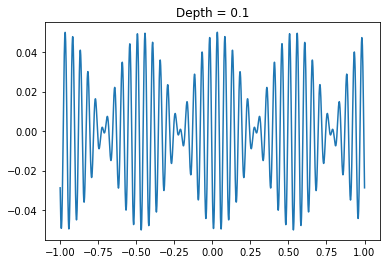

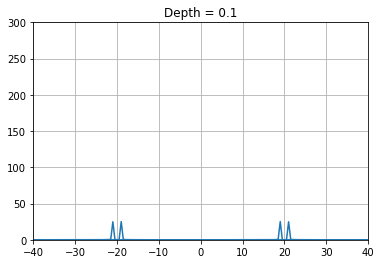

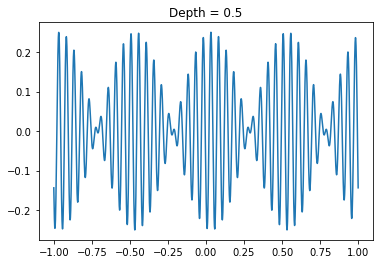

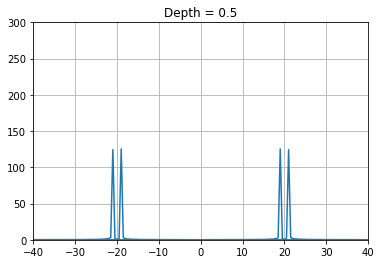

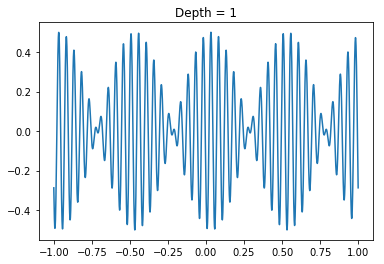

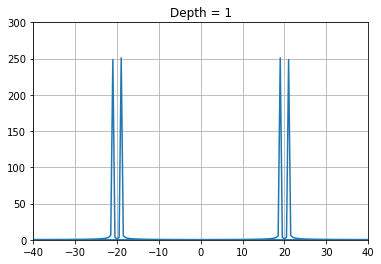

In [15]:
% matplotlib inline
# tasks 4

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq


def sig_modulation(m, t):
    
    phi = 0.43 * np.pi
    F_m = 1
    s_m = m * np.sin(F_m * 2 * np.pi * t + phi)
    # carrier signal
    f_c = 20 
    phi_c = 0.7 * np.pi
    s_c = np.cos(f_c * 2 * np.pi * t + phi_c)
    A_0 = 0.5

    # modulation
    s_am = A_0 * s_m * s_c
    fig = plt.figure()
    s = 'Depth = ' + str(m) 
    plt.title(s)
    plt.plot(t, s_am)
#     fig.savefig('pictures/004_signal.png', dpi=100)
    plt.show()
    # spectrus
    N = len(t)
    T = 1.0 / Fs
    s_amf = fft(s_am)
    xf = fftfreq(N, 1.0 / Fs)
    fig = plt.figure()
    plt.title(s)
    plt.xlim(-40, 40)
    plt.ylim(0, 300)
    plt.grid()
    plt.plot(xf, np.abs(s_amf)) 
#     fig.savefig('pictures/004_spectr.png', dpi=100)
    plt.show()

# discrete frequency
Fs = 1000
t = np.linspace(-1, 1, 2 * Fs)
sig_modulation(0.1, t)
sig_modulation(0.5, t)
sig_modulation(1, t)

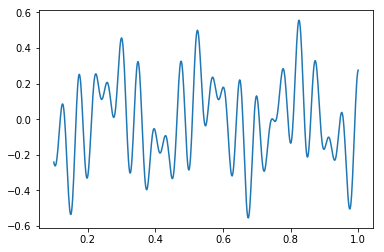

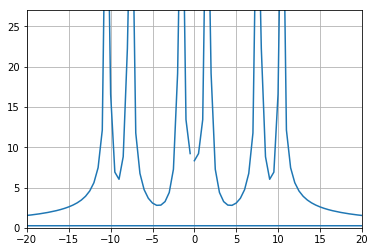

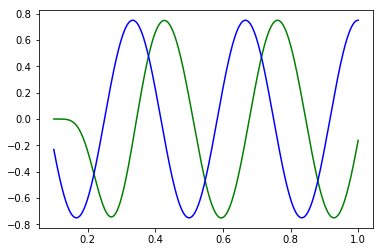

In [19]:
# %%writefile source03.py
#task 5
# % matplotlib inline
# why we get a moved signal

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y



# discrete frequency
Fs = 300
t = np.linspace(0.1, 1, 2 * Fs)

# depth 
m = 0.75

# signal
phi = 0.43 * np.pi
f_m = 3
s_m = m * np.cos(f_m * 2 * np.pi * t) #+ phi)

# carrier signal
f_c = 20 
# phi_c = 0.7 * np.pi
s_c = np.cos(f_c * 2 * np.pi * t) 
#              + phi_c)

# single side modulation
U_m = 0.5
s_am = U_m * s_m * s_c + 0.5 * m * U_m  * (np.cos((f_c + f_m)* t)) 
# + phi_c)  
vovas = U_m * s_m * s_c
fig = plt.figure()
plt.plot(t, s_am)
#     fig.savefig('pictures/004_signal.png', dpi=100)
plt.show()

# spectrus
N = len(t)
T = 1.0 / Fs
s_amf = fft(s_am)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.xlim(-20, 20)
plt.ylim(0, 27)
plt.grid()
plt.plot(xf, np.abs(s_amf))
#     fig.savefig('pictures/004_spectr.png', dpi=100)
plt.show()

# demodulation
# fig = plt.figure()
# plt.title('multiple res')
# plt.plot(t, s_d)
# plt.show()

def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

# multiplication with carrier
order = 5
# s_d = s_am * s_c
s_d = vovas * s_c

b, a = butter(order+1, 2*f_m  / Fs, btype='low', analog=False)
add_amplitude = 4 # after modulation signal hasnt the same amplitude
full_dem =  add_amplitude * lfilter(b, a, s_d)
fig = plt.figure()
plt.plot(t, full_dem, 'g-')
plt.plot(t, s_m, 'b-')
plt.show()

